# Fourier Series III

We have seen how to transform a time signal into its frequency (Fourier) represention via the fft. This week we will exploit the fact that this transform can go both ways. This will permit us to

- transform a recorded signal
- filter/cancel the undesired frequency components
- transform back to the time domain

Let us put this to work on our old, synthetic, friend

$$
  f(t) = \sin(40\pi t/T) - 3\cos(60\pi t/T) + 2\cos(80\pi t/T)
$$

We will introduce a mask in the frequency domain that removes the 6 Hz component.

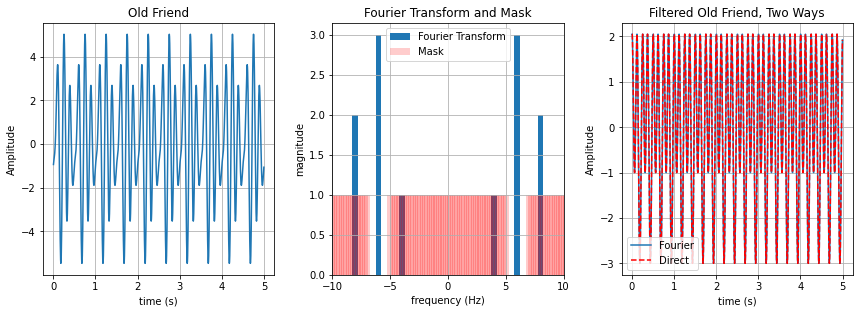

In [3]:
# filter demonstration on synthetic data
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

T = 5
Nt = 1000
dt = T/Nt
t = np.arange(dt/2,T,dt)
f = np.sin(40*np.pi*t/T) - 3*np.cos(60*np.pi*t/T) + 2*np.cos(80*np.pi*t/T) # old friend

ax1.plot(t, f)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid('on')
ax1.set_title('Old Friend')

freq = fftpack.fftfreq(Nt, dt)
u = fftpack.fft(f)
umag = abs(u)*2/Nt   # this extra scale factor (2/Nt) stems from fft implementation

ax2.bar(freq, umag, width=0.5)    # view positive and negative frequencies
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('magnitude')
ax2.set_xlim([-10,10])
ax2.grid('on')

mask = np.ones(freq.shape)           # build and view the mask
notchp = np.where( abs(freq-6) < 1 )
notchn = np.where( abs(freq+6) < 1 )
mask[notchp] = 0
mask[notchn] = 0
ax2.bar(freq, mask, width=0.5, color = 'r', alpha = 0.2)  # alpha is transparency factor
ax2.legend(['Fourier Transform','Mask'])
ax2.set_title('Fourier Transform and Mask')

umask = u*mask                    # apply the mask
fmask = fftpack.ifft(umask)       # return the time domain

ax3.plot(t, fmask.real)       # compared Fourier filtered signal to direct removal
fno6 = np.sin(40*np.pi*t/T) + 2*np.cos(80*np.pi*t/T) # old friend without 6 Hz piece
ax3.plot(t, fno6,'r--')
ax3.legend(['Fourier','Direct'])
ax3.set_xlabel('time (s)')
ax3.set_ylabel('Amplitude')
ax3.grid('on')
ax3.set_title('Filtered Old Friend, Two Ways');

In practice we do not have direct access to a formula for our recorded signal and so have only the indirect Fourier path by which to filter out noise or undesired frequency components.

Please save <a href="https://drive.google.com/file/d/1PxW4uAcEGFRAnIyV-ZSrre33zFYYstJd/view?usp=sharing">FourierWord.wav</a>
to your notebook folder for this course.

Once there, the next cell will allow you to play it.

In [4]:
import IPython.display as ipd
ipd.Audio('FourierWord.wav') # load a local wav file

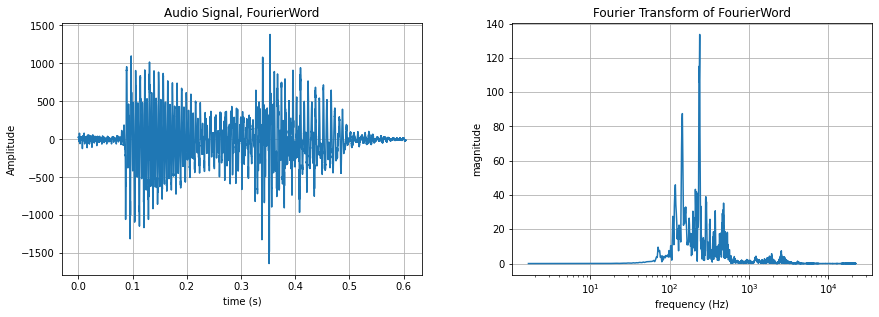

In [6]:
# display wav file and its fft

from scipy.io import wavfile

rate, f = wavfile.read('FourierWord.wav')  # read the sample rate and the signal itself
Nt = f.size
dt = 1/rate
t = np.arange(0, Nt*dt, dt)

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

ax1.plot(t, f)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid('on')
ax1.set_title('Audio Signal, FourierWord')

freq = fftpack.fftfreq(Nt, dt)
pind = np.where(freq>0)
#lofreq_ind = np.where(abs(freq-1200)<600) # indicies of frequencies of interest
u = fftpack.fft(f)
umag = abs(u)*2/Nt

#ax2.plot(freq[lofreq_ind], umag[lofreq_ind])
ax2.semilogx(freq[pind], umag[pind])
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('magnitude')
ax2.grid('on')
ax2.set_title('Fourier Transform of FourierWord');

We will next apply 3 different masks to this Fourier Transform. In each case we will then write and listen to the resulting wav file. 

As we have not yet learned the details of file reading/writing in python you may encounter errors in trying to re-run (overwrite) your files. Here are two work-arounds
- use the double-right-arrow button on your dashboard, this will restart your kernel and run all cells, or
- simply rename the wav files you wish to re-create, e.g., add a number

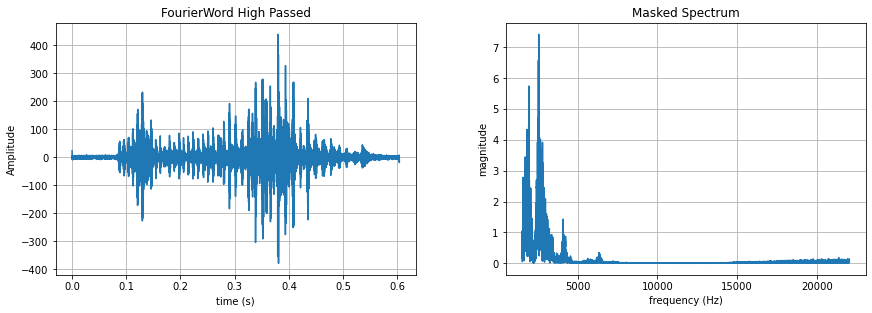

In [28]:
# high-pass filter, display, and play the filtered word

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

mask = np.ones(freq.shape)           # build and view the mask
notch = np.where( abs(freq) < 1500 )
mask[notch] = 0
umask = u*mask                    # apply the mask
fmask = fftpack.ifft(umask)       # return the time domain
data = fmask.real
wavfile.write('FourierHi.wav', rate, data.astype(np.int16))

ax1.plot(t, data)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid('on')
ax1.set_title('FourierWord High Passed')

umag = abs(umask)*2/Nt
pind = np.where(freq*mask>0)
ax2.plot(freq[pind], umag[pind])
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('magnitude')
ax2.grid('on')
ax2.set_title('Masked Spectrum');

ipd.Audio('FourierHi.wav')

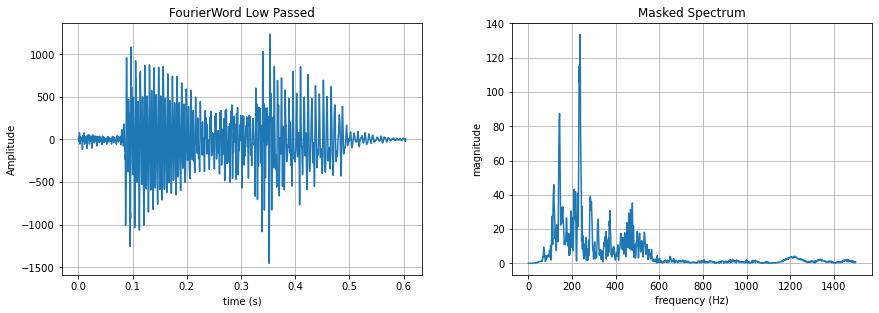

In [29]:
# low-pass filter, display, and play the filtered word

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

mask = np.ones(freq.shape)           # build and view the mask
notch = np.where( abs(freq) > 1500 )
mask[notch] = 0
umask = u*mask                    # apply the mask
fmask = fftpack.ifft(umask)       # return the time domain
data = fmask.real
wavfile.write('FourierLo.wav', rate, data.astype(np.int16))

ax1.plot(t, data)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid('on')
ax1.set_title('FourierWord Low Passed')

umag = abs(umask)*2/Nt
pind = np.where(freq*mask>0)
ax2.plot(freq[pind], umag[pind])
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('magnitude')
ax2.grid('on')
ax2.set_title('Masked Spectrum');

ipd.Audio('FourierLo.wav')

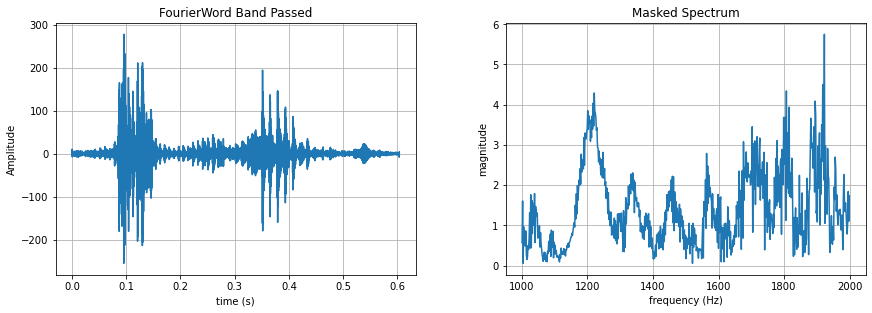

In [24]:
# band-pass filter, display, and play the filtered word

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

mask = np.zeros(freq.shape)           # build and view the mask
notchp = np.where( abs(freq-1500) < 500 )
mask[notchp] = 1
notchm = np.where( abs(freq+1500) < 500 )
mask[notchm] = 1
umask = u*mask                    # apply the mask
fmask = fftpack.ifft(umask)       # return the time domain
data = fmask.real
wavfile.write('FourierBP.wav', rate, data.astype(np.int16))

ax1.plot(t, data)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid('on')
ax1.set_title('FourierWord Band Passed')

umag = abs(umask)*2/Nt

ax2.plot(freq[notchp], umag[notchp])
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('magnitude')
ax2.grid('on')
ax2.set_title('Masked Spectrum');

ipd.Audio('FourierBP.wav')

## Homework.

Record a word of your speech in Audacity. Reproduce the final 5 plots of this notebook on your word. Experment with various cutoff frequencies. Label your plots accordingly. Upload your notebook, **and original word wav file to blackboard**.